In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [7]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [11]:
import pandas as pd

In [13]:
import seaborn as sns

In [15]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33168 files belonging to 18 classes.


In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8356 files belonging to 18 classes.


In [19]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>

In [21]:
for x,y in training_set:
  print(x.shape)
  print(y.shape)
  break

(32, 128, 128, 3)
(32, 18)


In [23]:
cnn = tf.keras.models.Sequential()

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\shilp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [37]:
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=18,activation='softmax'))

In [39]:

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │        27,018 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,812,742 (29.80 MB)

 Trainable params: 7,812,742 (29.80 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 526s 504ms/step - accuracy: 0.4974 - loss: 1.5770 - val_accuracy: 0.8591 - val_loss: 0.7087
Epoch 2/5
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 481s 464ms/step - accuracy: 0.9038 - loss: 0.3037 - val_accuracy: 0.9076 - val_loss: 0.6438
Epoch 3/5
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 547s 527ms/step - accuracy: 0.9495 - loss: 0.1588 - val_accuracy: 0.9126 - val_loss: 0.5427
Epoch 4/5
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 465s 448ms/step - accuracy: 0.9663 - loss: 0.1043 - val_accuracy: 0.9152 - val_loss: 0.5120
Epoch 5/5
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 472s 456ms/step - accuracy: 0.9731 - loss: 0.0836 - val_accuracy: 0.9186 - val_loss: 0.7012


In [43]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1037/1037 ━━━━━━━━━━━━━━━━━━━━ 137s 132ms/step - accuracy: 0.9862 - loss: 0.0427
Training accuracy: 0.9872769117355347


In [45]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

262/262 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.9193 - loss: 0.6851
Validation accuracy: 0.9186213612556458


In [47]:
cnn.save('trained_plant_disease_model.keras')

In [49]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7007356286048889,
  0.9205559492111206,
  0.9526350498199463,
  0.9667450785636902,
  0.9746140837669373],
 'loss': [0.9348892569541931,
  0.25251397490501404,
  0.14905574917793274,
  0.10386565327644348,
  0.08093035221099854],
 'val_accuracy': [0.8591431379318237,
  0.9076113104820251,
  0.9126376509666443,
  0.9151507616043091,
  0.9186213612556458],
 'val_loss': [0.7087163925170898,
  0.643768846988678,
  0.5426753163337708,
  0.5119954347610474,
  0.7011740207672119]}

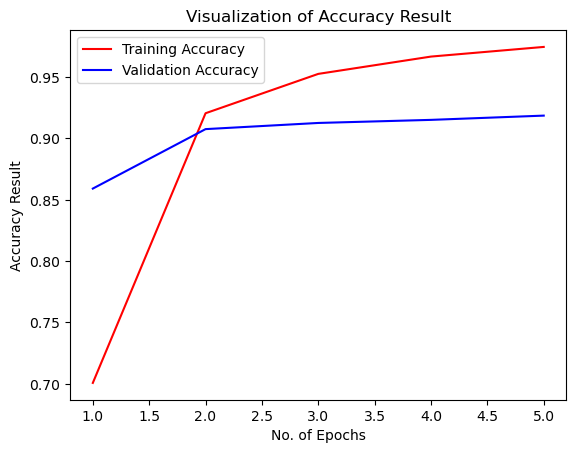

In [68]:
epochs = [i for i in range(1,6)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [70]:
class_name =  validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [72]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8356 files belonging to 18 classes.


In [88]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

8356/8356 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step


(array([[2.18448567e-05, 9.85950291e-01, 3.47775567e-05, ...,
         3.85242794e-03, 7.49803064e-07, 5.16880391e-06],
        [4.49682557e-06, 9.41749454e-01, 4.06346335e-05, ...,
         4.74978285e-03, 5.70468728e-07, 1.19696879e-05],
        [3.33817588e-04, 9.59306955e-01, 2.75820750e-03, ...,
         1.05937570e-02, 1.30985645e-05, 1.11670852e-04],
        ...,
        [2.93652192e-07, 1.81192900e-05, 2.04324699e-08, ...,
         1.94800620e-09, 3.96805092e-07, 9.99980807e-01],
        [1.54552158e-08, 2.31153905e-07, 2.13363838e-09, ...,
         1.86636623e-10, 9.54366453e-09, 9.99999762e-01],
        [2.24733210e-09, 1.94634458e-06, 5.32270761e-08, ...,
         1.97698258e-09, 7.14854559e-06, 9.99985337e-01]], dtype=float32),
 (8356, 18))

In [98]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(8356,), dtype=int64, numpy=array([ 1,  1,  1, ..., 17, 17, 17], dtype=int64)>

In [100]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(8356, 18), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [101]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(8356,), dtype=int64, numpy=array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64)>

In [105]:
from sklearn.metrics import confusion_matrix,classification_report


In [107]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                          precision    recall  f1-score   support

                      Apple___Apple_scab       0.74      0.07      0.13       504
                         Apple___healthy       0.66      0.98      0.79       502
Cherry_(including_sour)___Powdery_mildew       0.97      0.96      0.97       421
       Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
     Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      0.99       477
                  Corn_(maize)___healthy       0.99      1.00      0.99       465
                       Grape___Black_rot       0.99      1.00      0.99       472
                         Grape___healthy       0.99      0.98      0.99       423
                  Peach___Bacterial_spot       0.84      0.97      0.90       459
                         Peach___healthy       0.95      0.99      0.97       432
           Pepper,_bell___Bacterial_spot       0.87      0.97      0.92       478
               

In [109]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(18, 18)

In [112]:
cm

array([[ 37, 232,   8,   0,   2,   3,   2,   2,  63,   4,  25,   0,  81,
          0,   6,  33,   4,   2],
       [  0, 492,   1,   1,   0,   0,   0,   0,   1,   7,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  2,   3, 406,   0,   0,   0,   0,   0,   0,   2,   2,   1,   1,
          0,   2,   0,   2,   0],
       [  0,   2,   0, 449,   0,   0,   2,   0,   0,   0,   1,   2,   0,
          0,   0,   0,   0,   0],
       [  1,   0,   0,   0, 475,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 463,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 470,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   1, 416,   1,   0,   1,   1,   0,
          1,   0,   1,   0,   0],
       [  2,   1,   0,   0,   1,   0,   0,   0, 445,   3,   7,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,

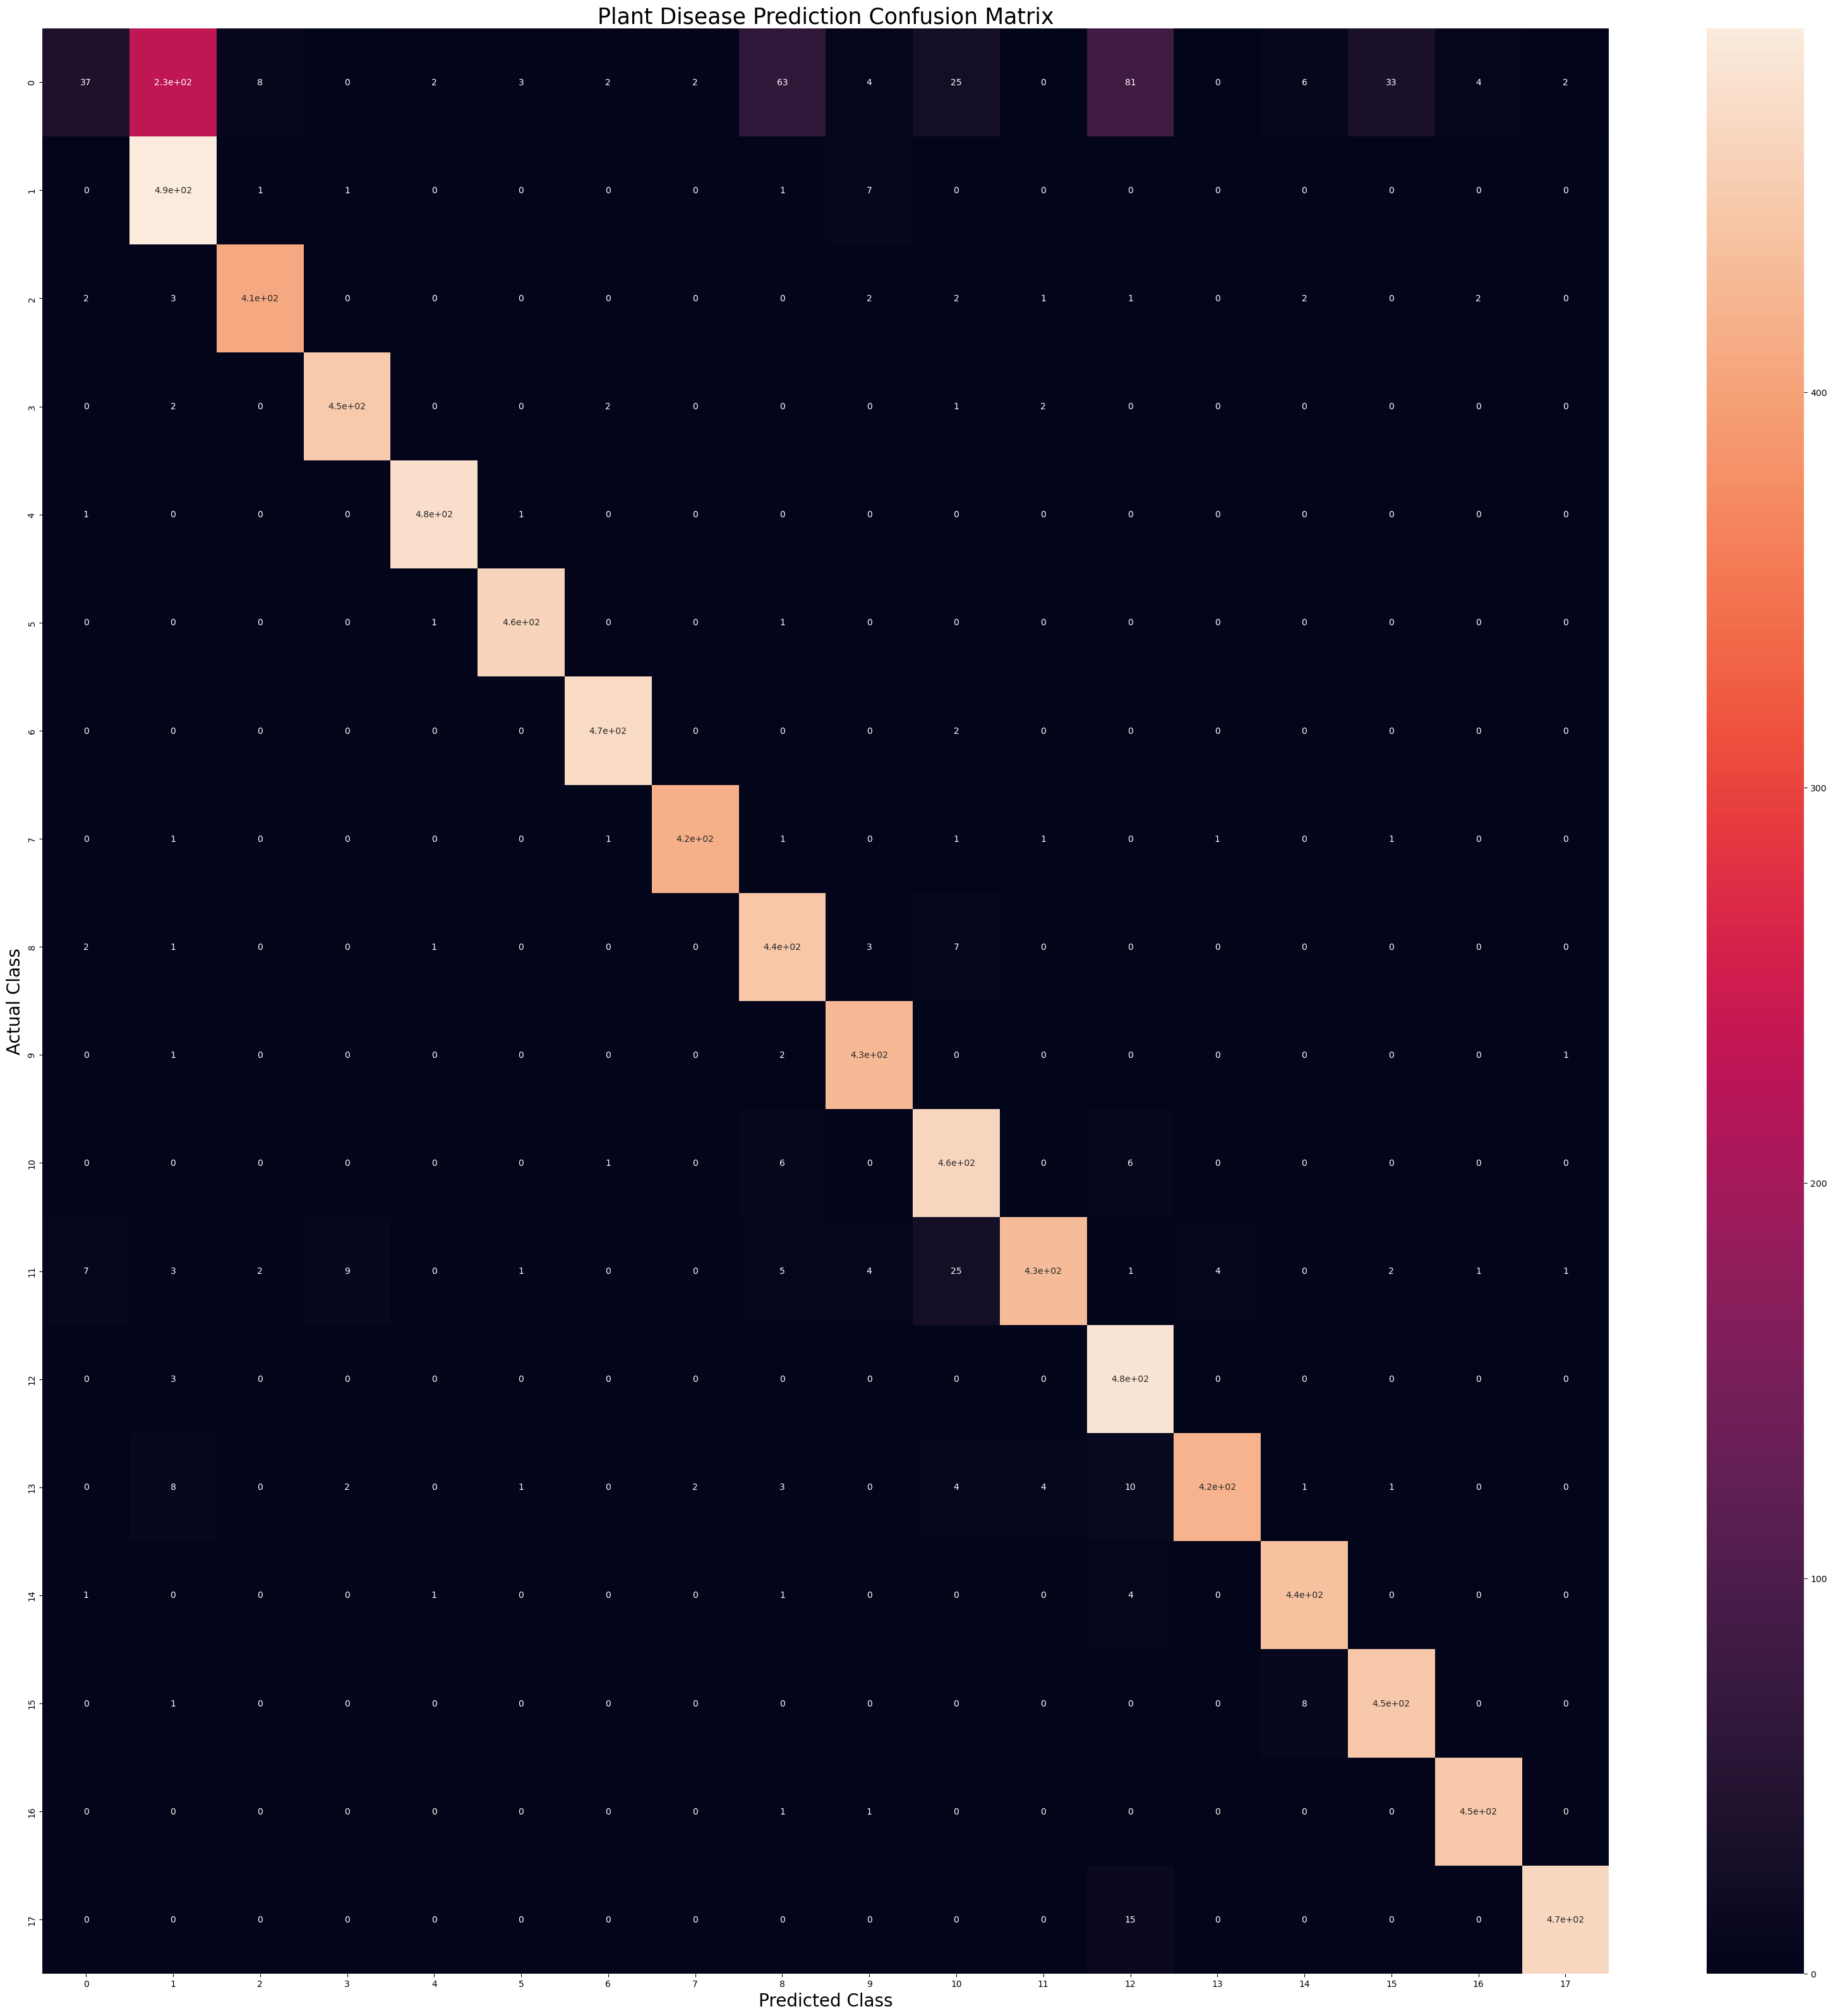

In [114]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()